<a href="https://colab.research.google.com/github/soroush-04/Road-Accident-prediction/blob/main/Copy_of_Final_Model_New.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv('/content/drive/MyDrive/Data analytics/Final Project/Copy project/Train_data_Acc.csv',
                   parse_dates=['differ_HHMM','S_time'])

In [ ]:
data_copy = data.copy()

In [ ]:
print('Total Number of {} rows and {} columns in the Accident dataset'.format(data.shape[0],data.shape[1]))

Total Number of 192 rows and 13 columns in the Accident dataset


In [ ]:
print("Null values in the dataset?: {}".format(data.isnull().values.any()))

Null values in the dataset?: False


In [ ]:
print(data.dtypes)

ID_Start_Lat_Lonh                int64
Severity                         int64
differ_HHMM             datetime64[ns]
S_time                  datetime64[ns]
Month                            int64
Start_Lat                      float64
Start_Lng                      float64
Distance.mi.                   float64
Accident.Description            object
Traffic.Speed                    int64
Street                          object
City                            object
Weather_Condition               object
dtype: object


In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le=LabelEncoder()

In [ ]:
data['Accident.Description']=le.fit_transform(data['Accident.Description'])
data['Accident.Description']

0      3
1      3
2      7
3      3
4      3
      ..
187    3
188    0
189    1
190    3
191    1
Name: Accident.Description, Length: 192, dtype: int64

In [ ]:
data['Street']=le.fit_transform(data['Street'])
data['Street']

0      10
1      10
2       5
3      13
4      14
       ..
187    13
188     8
189     9
190    13
191     6
Name: Street, Length: 192, dtype: int64

In [ ]:
data['City']=le.fit_transform(data['City'])


In [ ]:
data['Weather_Condition']=le.fit_transform(data['Weather_Condition'])


In [ ]:
print(data.dtypes)

ID_Start_Lat_Lonh                int64
Severity                         int64
differ_HHMM             datetime64[ns]
S_time                  datetime64[ns]
Month                            int64
Start_Lat                      float64
Start_Lng                      float64
Distance.mi.                   float64
Accident.Description             int64
Traffic.Speed                    int64
Street                           int64
City                             int64
Weather_Condition                int64
dtype: object


In [ ]:
X = data.drop(columns=['Severity'])
y = data['Severity']

In [ ]:
print(X.head(5))

   ID_Start_Lat_Lonh         differ_HHMM  ... City  Weather_Condition
0                  1 2021-11-24 00:45:00  ...    6                  5
1                  1 2021-11-24 00:59:00  ...    6                  8
2                  6 2021-11-24 00:29:00  ...    4                  7
3                  8 2021-11-24 00:30:00  ...    8                 10
4                  9 2021-11-24 00:27:00  ...   12                  6

[5 rows x 12 columns]


In [ ]:

X['differ_HHMM']=le.fit_transform(X['differ_HHMM'])
X['S_time']=le.fit_transform(X['S_time'])

In [ ]:
print(X.dtypes)

ID_Start_Lat_Lonh         int64
differ_HHMM               int64
S_time                    int64
Month                     int64
Start_Lat               float64
Start_Lng               float64
Distance.mi.            float64
Accident.Description      int64
Traffic.Speed             int64
Street                    int64
City                      int64
Weather_Condition         int64
dtype: object


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30,random_state=1)

In [ ]:
X_test_copy=X_test.copy()

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()


In [ ]:
X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

In [ ]:

from sklearn import svm

clf = svm.SVC()

clf.fit(X_train, y_train)


SVC()

In [ ]:
y_pred = clf.predict(X_test)

from sklearn import metrics

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.9482758620689655


In [ ]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

[[28  2]
 [ 1 27]]


In [ ]:
from sklearn.metrics import plot_confusion_matrix

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


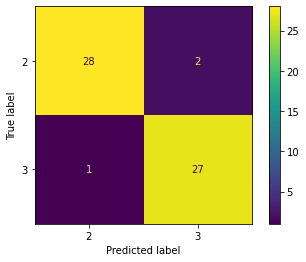

In [ ]:
plot_confusion_matrix(clf, X_test, y_test)
plt.show()

In [ ]:
df = pd.DataFrame(X_test_copy)

In [ ]:
print(df)

     ID_Start_Lat_Lonh  differ_HHMM  S_time  ...  Street  City  Weather_Condition
44                  16            4     147  ...       6     3                  6
69                  35            8     122  ...      13    11                  4
161                 26            4      30  ...       1     1                  0
35                  40            8     156  ...       0     0                  8
182                 26            4       9  ...       1     1                  7
11                  19            7     180  ...      11     0                  8
122                 66            4      69  ...       1     1                  7
81                  26            4     110  ...       1     1                  7
110                 20            4      81  ...      12     5                  6
180                 12            4      11  ...       8     9                  6
172                  9            5      19  ...      14    12                  1
127             

In [ ]:
df['y_test']=y_test

In [ ]:
df['y_pred']=y_pred

In [ ]:
print(df)

     ID_Start_Lat_Lonh  differ_HHMM  S_time  ...  Weather_Condition  y_test  y_pred
44                  16            4     147  ...                  6       3       3
69                  35            8     122  ...                  4       2       2
161                 26            4      30  ...                  0       3       3
35                  40            8     156  ...                  8       3       3
182                 26            4       9  ...                  7       3       3
11                  19            7     180  ...                  8       3       3
122                 66            4      69  ...                  7       2       2
81                  26            4     110  ...                  7       3       3
110                 20            4      81  ...                  6       2       2
180                 12            4      11  ...                  6       3       3
172                  9            5      19  ...                  1       2 

In [ ]:
df.to_csv('SeverityPoint.csv', index=False)

In [ ]:
location = "/content/SeverityPoint.csv"

In [ ]:
PP = pd.read_csv(location)

In [ ]:
import folium
map = folium.Map(location=[PP.Start_Lat.mean(), PP.Start_Lng.mean()], zoom_start=14, control_scale=True)

In [ ]:
for index, location_info in PP.iterrows():
    folium.Marker([location_info["Start_Lat"], location_info["Start_Lng"]],tooltip=[location_info["y_pred"],location_info["y_test"]],popup="<stong>prediction,test</stong>").add_to(map)

In [ ]:
map

In [ ]:
New_file = pd.read_csv('/content/drive/MyDrive/Data analytics/Final Project/Copy project/dummy_file.csv',
                       parse_dates=['differ_HHMM','S_time'])

In [ ]:
New_file_copy = New_file.copy()

In [ ]:
New_file['Accident.Description']=le.fit_transform(New_file['Accident.Description'])
New_file['Street']=le.fit_transform(New_file['Street'])
New_file['City']=le.fit_transform(New_file['City'])
New_file['Weather_Condition']=le.fit_transform(New_file['Weather_Condition'])

In [ ]:

New_file['differ_HHMM']=le.fit_transform(New_file['differ_HHMM'])
New_file['S_time']=le.fit_transform(New_file['S_time'])

In [ ]:
New_file = scaler.fit_transform(New_file)

In [ ]:
New_pred = clf.predict(New_file)

New_df = pd.DataFrame(New_file_copy)
New_df['y_pred'] = New_pred

In [ ]:
Temp = pd.read_csv('/content/drive/MyDrive/Data analytics/Final Project/Copy project/accident_data_both_speed_16_17_18_19_20.csv')
New_Sev = Temp['Severity']
New_Sev = New_Sev.iloc[:56]
New_Sev

0     3
1     3
2     3
3     3
4     3
5     3
6     3
7     2
8     4
9     3
10    2
11    2
12    2
13    2
14    2
15    3
16    2
17    3
18    4
19    4
20    4
21    1
22    1
23    2
24    3
25    2
26    3
27    3
28    3
29    3
30    3
31    3
32    3
33    3
34    3
35    3
36    3
37    3
38    3
39    3
40    3
41    3
42    3
43    2
44    3
45    3
46    3
47    3
48    3
49    3
50    3
51    3
52    3
53    3
54    2
55    2
Name: Severity, dtype: int64

In [ ]:
print("Accuracy:",metrics.accuracy_score(New_pred,New_Sev))

Accuracy: 0.6964285714285714


In [ ]:
df1 = pd.DataFrame(New_file_copy)

In [ ]:
df1['New_pred']=New_pred

In [ ]:
df1.to_csv('Increment_map.csv', index=False)

In [ ]:
location1= "/content/Increment_map.csv"

In [ ]:
PP1 = pd.read_csv(location1)

In [ ]:
import folium
map1 = folium.Map(location=[PP1.Start_Lat.mean(), PP1.Start_Lng.mean()], zoom_start=14, control_scale=True)

In [ ]:
for index, location_info in PP1.iterrows():
    folium.Marker([location_info["Start_Lat"], location_info["Start_Lng"]],tooltip=[location_info["New_pred"]],popup="<stong>prediction</stong>").add_to(map1)

In [ ]:
map1